# Aumento del precio del alquiler en Girona

En este notebook crearemos un par de gráficos (estáticos e interactivos) que nos permitan visualizar el aumento del precio del alquiler en la ciudad de Girona.
Para ello, nos basaremos en un documento en formato *csv* que recoge la media de las fianzas dipositadas en el Institut Català del Sòl (INCASÒL) durante el año.
Para el tratamiento de datos, instalaremos e importaremos las librerías Numpy y Pandas.

In [8]:
#!pip install numpy
#!pip install pandas

import pandas as pd
import numpy as np

In [9]:
alquiler = pd.read_csv('../data/precio-medio-alquiler-2004-2022-fianzasIncasol.csv', delimiter=',')

In [10]:
alquiler

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
0,698,624,638,634,598,561,515,486,466,472,493,529,548,546,569,570,538,469


Pese a ser una tabla muy simple y con pocos elementos, me estoy encontrando con problemas para crear un gráfico. Por ello, vamos a pasar los valores a unos *array*.

In [11]:
años = [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
media_fianzas = [698, 624, 638, 634, 598, 561, 515, 486, 466, 472, 493, 529, 548, 546, 569, 570, 538, 469]

## Gráfico de líneas con Matplotlib

Descargamos, si es necesario, e importamos la librería Matplotlib para crear el gráfico de barras.

In [12]:
#!pip install matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt

Ahora procedemos a dibujar el gráfico, añadiendo su título correspondiente, personalizando los colores, etc.

(array([2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5, 2020. ,
        2022.5, 2025. ]),
 [Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2025.0, 0, '2025.0')])

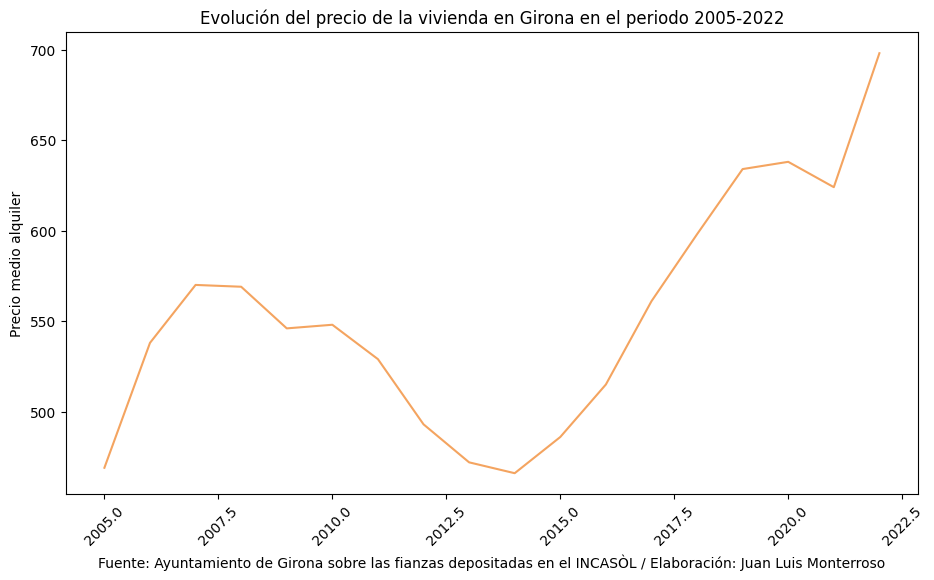

In [13]:
plt.figure(figsize=(11,6))
plt.plot(años, media_fianzas, color = "#F4A460")
plt.xlabel('Fuente: Ayuntamiento de Girona sobre las fianzas depositadas en el INCASÒL / Elaboración: Juan Luis Monterroso')
plt.ylabel('Precio medio alquiler')
plt.title('Evolución del precio de la vivienda en Girona en el periodo 2005-2022')
plt.xticks(rotation=45)
#plt.savefig('../images/evolucion-alquiler-2005-2022', format='svg') # Lo guardamos en formato svg para su mejor adaptación a la web

El gráfico no es demasiado preciso ya que muestra los años en formato decimal. En el gráfico interactivo de Plotly no tendremos ese problema.

## Gráfico de líneas interactivo con Plotly

Para crear el gráfico interactivo debemos instalar e importar la librería Plotly. Seguidamente, personalizaremos el gráfico.

In [25]:
#!pip install plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

trace1 = go.Line(
    x=años,
    y=media_fianzas,
    name='Numero',
    marker=dict(color='#F4A460')
)

datas = [trace1]


layout = dict(
    
    title=dict(
        text="Precio medio del alquiler en <br> Girona en el periodo 2005-2022",
        font=dict(family='Calibri', size=18, color='black')
    ),
    xaxis=dict(
        tickmode='linear',
        tick0=2005,
        dtick=1
    ),
    plot_bgcolor='white',
    
     annotations=[
        dict(
            x=0.5,
            y=-0.245,
            xref='paper',
            yref='paper',
            text='Fuente: Ayuntamiento de Girona (fianzas depositadas en INCASÒL) <br> Elaboración: Juan Luis Monterroso',
            showarrow=False,
            font=dict(family='Calibri', size=12, color='black')
        )
    ]
)

fig = go.Figure(data=datas, layout=layout)

iplot(fig) 

# Opcionalmente, guardar el gráfico en un archivo HTML
fig.write_html('../images/evolucion-alquiler-2005-2022.html')
